In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import layers
from keras import models
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os, shutil

Using TensorFlow backend.


In [2]:
train_dir = '/home/minhdoan/Documents/Neural-Network/Projects/dataset/project2/cat-and-dog-small/train'
validation_dir = '/home/minhdoan/Documents/Neural-Network/Projects/dataset/project2/cat-and-dog-small/validation'
train_cats_dir = '/home/minhdoan/Documents/Neural-Network/Projects/dataset/project2/cat-and-dog-small/train/cats'

In [3]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

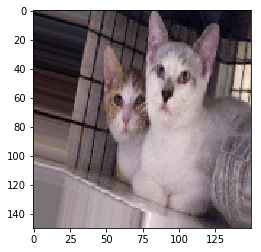

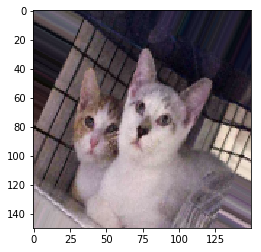

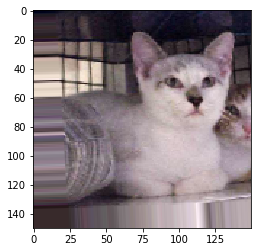

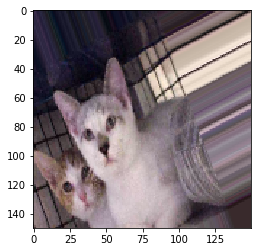

In [4]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
                        train_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size = 20,
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 47s 474ms/step - loss: 0.6955 - acc: 0.5200 - val_loss: 0.6786 - val_acc: 0.5300
Epoch 2/30
100/100 [==============================] - 45s 452ms/step - loss: 0.6688 - acc: 0.5930 - val_loss: 0.6798 - val_acc: 0.5450
Epoch 3/30
100/100 [==============================] - 45s 450ms/step - loss: 0.6297 - acc: 0.6455 - val_loss: 0.6453 - val_acc: 0.6140
Epoch 4/30
100/100 [==============================] - 45s 451ms/step - loss: 0.5804 - acc: 0.6935 - val_loss: 0.5899 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 45s 450ms/step - loss: 0.5367 - acc: 0.7365 - val_loss: 0.7934 - val_acc: 0.5620
Epoch 6/30
100/100 [==============================] - 45s 452ms/step - loss: 0.5107 - acc: 0.7515 - val_loss: 0.5749 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 45s 454ms/step - loss: 0.4721 - acc: 0.7700 - val_loss: 0.5525 - val_acc: 0.7200
Epoch 8/30
100/100 [==============================] - 4

In [20]:
model.save('cats_and_dogs_small_1.h5')

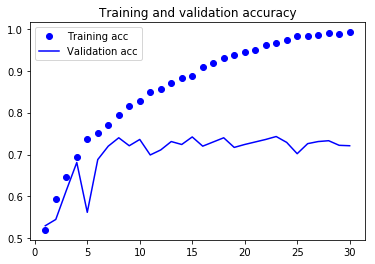

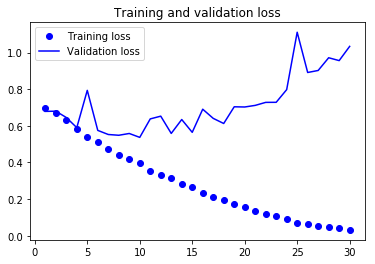

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [21]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 86s 858ms/step - loss: 0.6910 - acc: 0.5244 - val_loss: 0.6763 - val_acc: 0.5990
Epoch 2/100
100/100 [==============================] - 74s 736ms/step - loss: 0.6732 - acc: 0.5691 - val_loss: 0.6787 - val_acc: 0.5680
Epoch 3/100
100/100 [==============================] - 74s 737ms/step - loss: 0.6574 - acc: 0.5906 - val_loss: 0.6513 - val_acc: 0.6020
Epoch 4/100
100/100 [==============================] - 73s 734ms/step - loss: 0.6365 - acc: 0.6272 - val_loss: 0.6174 - val_acc: 0.6420
Epoch 5/100
100/100 [==============================] - 74s 737ms/step - loss: 0.6239 - acc: 0.6537 - val_loss: 0.5889 - val_acc: 0.6900
Epoch 6/100
100/100 [==============================] - 74s 737ms/step - loss: 0.6121 - acc: 0.6603 - val_loss: 0.5766 - val_acc: 0.7010
Epoch 7/100
100/100 [==============================] - 73s 735ms/step - loss: 0.6019 - acc: 0.6728 - val_loss: 0.6082 - val_acc: 0.6480
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 73s 731ms/step - loss: 0.4100 - acc: 0.8097 - val_loss: 0.4364 - val_acc: 0.7910
Epoch 62/100
100/100 [==============================] - 73s 730ms/step - loss: 0.4121 - acc: 0.8084 - val_loss: 0.4100 - val_acc: 0.8300
Epoch 63/100
100/100 [==============================] - 73s 729ms/step - loss: 0.3894 - acc: 0.8253 - val_loss: 0.4261 - val_acc: 0.8050
Epoch 64/100
100/100 [==============================] - 73s 733ms/step - loss: 0.4007 - acc: 0.8197 - val_loss: 0.4614 - val_acc: 0.7870
Epoch 65/100
100/100 [==============================] - 73s 729ms/step - loss: 0.3865 - acc: 0.8244 - val_loss: 0.4640 - val_acc: 0.7820
Epoch 66/100
100/100 [==============================] - 73s 732ms/step - loss: 0.3951 - acc: 0.8134 - val_loss: 0.4260 - val_acc: 0.8230
Epoch 67/100
100/100 [==============================] - 73s 730ms/step - loss: 0.3960 - acc: 0.8209 - val_loss: 0.4139 - val_acc: 0.8200
Epoch 68/100
100/100 [===================

In [22]:
model.save('cats_and_dogs_small_2_denses.h5')

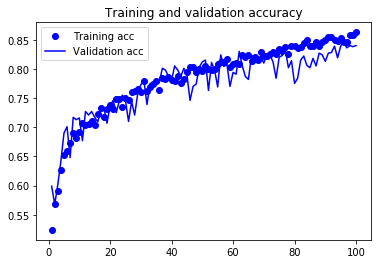

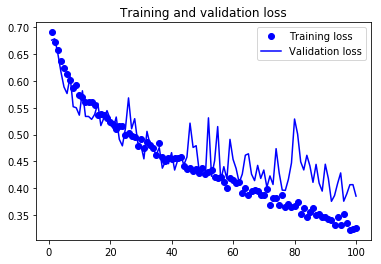

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [27]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 74s 737ms/step - loss: 0.6926 - acc: 0.5119 - val_loss: 0.6911 - val_acc: 0.4830
Epoch 2/100
100/100 [==============================] - 72s 717ms/step - loss: 0.6889 - acc: 0.5375 - val_loss: 0.6835 - val_acc: 0.5160
Epoch 3/100
100/100 [==============================] - 72s 718ms/step - loss: 0.6821 - acc: 0.5450 - val_loss: 0.6688 - val_acc: 0.5690
Epoch 4/100
100/100 [==============================] - 72s 716ms/step - loss: 0.6723 - acc: 0.5741 - val_loss: 0.6579 - val_acc: 0.5970
Epoch 5/100
100/100 [==============================] - 72s 717ms/step - loss: 0.6673 - acc: 0.5922 - val_loss: 0.6624 - val_acc: 0.5860
Epoch 6/100
100/100 [==============================] - 72s 718ms/step - loss: 0.6599 - acc: 0.5969 - val_loss: 0.6792 - val_acc: 0.5450
Epoch 7/100
100/100 [==============================] - 72s 716ms/step - loss: 0.6564 - acc: 0.6028 - val_loss: 0.6306 - val_acc: 0.6200
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 71s 714ms/step - loss: 0.4732 - acc: 0.7688 - val_loss: 0.5353 - val_acc: 0.7380
Epoch 62/100
100/100 [==============================] - 71s 710ms/step - loss: 0.4798 - acc: 0.7650 - val_loss: 0.5052 - val_acc: 0.7540
Epoch 63/100
100/100 [==============================] - 71s 714ms/step - loss: 0.4700 - acc: 0.7775 - val_loss: 0.4652 - val_acc: 0.7830
Epoch 64/100
100/100 [==============================] - 71s 713ms/step - loss: 0.4736 - acc: 0.7731 - val_loss: 0.4824 - val_acc: 0.7740
Epoch 65/100
100/100 [==============================] - 71s 709ms/step - loss: 0.4747 - acc: 0.7744 - val_loss: 0.4932 - val_acc: 0.7750
Epoch 66/100
100/100 [==============================] - 71s 712ms/step - loss: 0.4668 - acc: 0.7769 - val_loss: 0.4561 - val_acc: 0.7910
Epoch 67/100
100/100 [==============================] - 71s 710ms/step - loss: 0.4576 - acc: 0.7866 - val_loss: 0.4949 - val_acc: 0.7780
Epoch 68/100
100/100 [===================

In [28]:
model.save('cats_and_dogs_small_1_dense.h5')

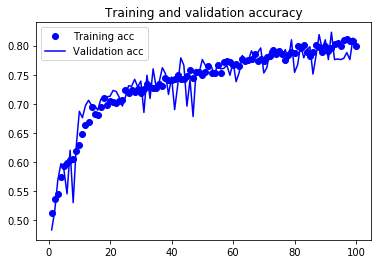

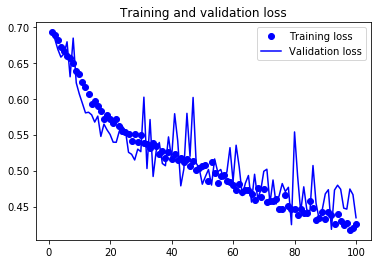

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()